In [1]:
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import os
from glob import glob

In [2]:
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from keras.layers import SimpleRNN

In [3]:
col_names = ['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Label']

print(col_names)

['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd By

In [4]:
path = r'C:\Users\anush\cic-ids dataset 2018'
extension = 'csv'
os.chdir(path)
result = glob('*.{}'.format(extension))
print(result)

['02-14-2018.csv', '02-15-2018.csv', '02-16-2018.csv']


In [5]:
dataset_1= pd.read_csv(
r'C:\Users\anush\cic-ids dataset 2018\02-14-2018.csv')

In [6]:
dataset_2= pd.read_csv(
r'C:\Users\anush\cic-ids dataset 2018\02-15-2018.csv')

In [7]:
dataset_3= pd.read_csv(
r'C:\Users\anush\cic-ids dataset 2018\02-16-2018.csv',low_memory=False)

In [8]:
dataset_1.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [9]:
dataset_1.shape

(1048575, 80)

In [10]:
dataset_2.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,15/02/2018 08:29:05,37366762,14,12,2168,2993,712,0,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,15/02/2018 08:29:42,543,2,0,64,0,64,0,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
3,0,0,15/02/2018 08:28:07,112640703,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,Benign
4,0,0,15/02/2018 08:30:56,112640874,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,Benign


In [11]:
dataset_2.shape

(1048575, 80)

In [12]:
dataset_3.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,16/02/2018 08:27:23,112640768,3,0,0,0,0,0,...,0,0,0,0,0,56300000,138.5929291,56300000,56300000,Benign
1,0,0,16/02/2018 08:30:12,112641773,3,0,0,0,0,0,...,0,0,0,0,0,56300000,263.7508294,56300000,56300000,Benign
2,35605,6,16/02/2018 08:26:55,20784143,23,44,2416,1344,240,64,...,20,2624734,0,2624734,2624734,9058214,0,9058214,9058214,Benign
3,0,0,16/02/2018 08:33:01,112640836,3,0,0,0,0,0,...,0,0,0,0,0,56300000,82.02438662,56300000,56300000,Benign
4,23,6,16/02/2018 08:27:59,20,1,1,0,0,0,0,...,20,0,0,0,0,0,0,0,0,Benign


In [13]:
dataset=pd.concat([dataset_1,dataset_2,dataset_3])

In [15]:
dataset.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [16]:
dataset.shape

(3145725, 80)

<AxesSubplot: ylabel='Label'>

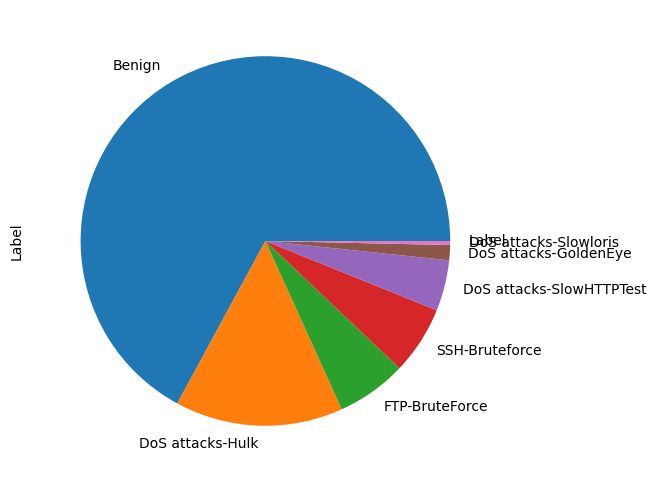

In [17]:
dataset['Label'].value_counts().plot(kind='pie',figsize=(6,6))

In [20]:
x =dataset.drop(['Label'], axis=1)
y = dataset['Label']

In [21]:
y.value_counts()

Benign                      2110475
DoS attacks-Hulk             461912
FTP-BruteForce               193360
SSH-Bruteforce               187589
DoS attacks-SlowHTTPTest     139890
DoS attacks-GoldenEye         41508
DoS attacks-Slowloris         10990
Label                             1
Name: Label, dtype: int64

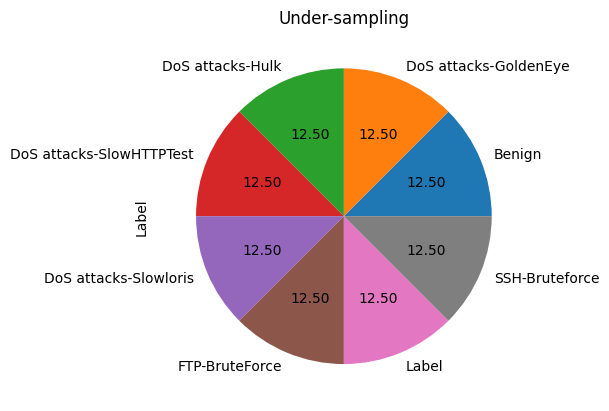

In [22]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy ="not minority")
X_res,y_res = rus.fit_resample(x,y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_= ax.set_title("Under-sampling")

In [23]:
training_data = dataset.sample(frac=0.8, random_state=25)
testing_data = dataset.drop(training_data.index)

<AxesSubplot: ylabel='Label'>

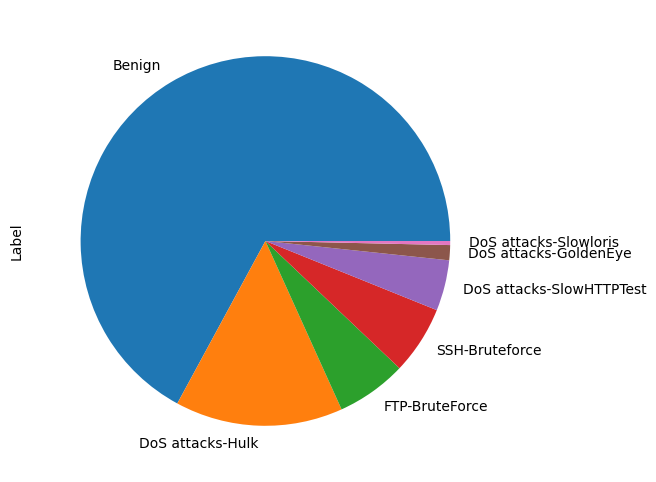

In [24]:
training_data['Label'].value_counts().plot(kind='pie',figsize=(6,6))

In [25]:
print('Dimensions of the Training set:',training_data.shape)
print('Dimensions of the testing set:',testing_data.shape)

Dimensions of the Training set: (2516580, 80)
Dimensions of the testing set: (25269, 80)


In [26]:

training_data.head()


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
64624,21,6,16/02/2018 10:44:37,3,1,1,0,0,0,0,...,40,0,0,0,0,0,0,0,0,DoS attacks-SlowHTTPTest
1011211,21,6,16/02/2018 10:17:48,2,1,1,0,0,0,0,...,40,0,0,0,0,0,0,0,0,DoS attacks-SlowHTTPTest
691456,80,6,16/02/2018 01:47:36,24993,2,0,0,0,0,0,...,32,0,0,0,0,0,0,0,0,DoS attacks-Hulk
284395,80,6,16/02/2018 01:46:08,35670,2,0,0,0,0,0,...,32,0,0,0,0,0,0,0,0,DoS attacks-Hulk
31658,21,6,16/02/2018 10:28:04,2,1,1,0,0,0,0,...,40,0,0,0,0,0,0,0,0,DoS attacks-SlowHTTPTest


In [27]:
testing_data.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
88,9984,6,14/02/2018 09:34:46,23325726,41,36,3616,768,336,0,...,20,1815918.0,0.0,1815918,1815918,18071741.0,0.0,18071741,18071741,Benign
274,21,6,14/02/2018 10:33:31,2,1,1,0,0,0,0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,FTP-BruteForce
513,21,6,14/02/2018 10:33:38,3,1,1,0,0,0,0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,FTP-BruteForce
601,21,6,14/02/2018 10:33:41,1,1,1,0,0,0,0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,FTP-BruteForce
656,21,6,14/02/2018 10:33:43,2,1,1,0,0,0,0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,FTP-BruteForce


In [28]:
print('Label distribution in the Training set:')
print("****************************************")
print(training_data['Label'].value_counts())


Label distribution in the Training set:
****************************************
Benign                      1688382
DoS attacks-Hulk             369233
FTP-BruteForce               154918
SSH-Bruteforce               150467
DoS attacks-SlowHTTPTest     111561
DoS attacks-GoldenEye         33170
DoS attacks-Slowloris          8849
Name: Label, dtype: int64


In [29]:
print('Training set:')
for col_name in training_data.columns:
    if training_data[col_name].dtypes == 'object' :
        unique_cat = len(training_data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribution of categories in destination port:')
print(training_data['Dst Port'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'Dst Port' has 39871 categories
Feature 'Protocol' has 6 categories
Feature 'Timestamp' has 68780 categories
Feature 'Flow Duration' has 1060411 categories
Feature 'Tot Fwd Pkts' has 923 categories
Feature 'Tot Bwd Pkts' has 1406 categories
Feature 'TotLen Fwd Pkts' has 8834 categories
Feature 'TotLen Bwd Pkts' has 27126 categories
Feature 'Fwd Pkt Len Max' has 1616 categories
Feature 'Fwd Pkt Len Min' has 158 categories
Feature 'Fwd Pkt Len Mean' has 30389 categories
Feature 'Fwd Pkt Len Std' has 56486 categories
Feature 'Bwd Pkt Len Max' has 1380 categories
Feature 'Bwd Pkt Len Min' has 296 categories
Feature 'Bwd Pkt Len Mean' has 46916 categories
Feature 'Bwd Pkt Len Std' has 58213 categories
Feature 'Flow Byts/s' has 1147265 categories
Feature 'Flow Pkts/s' has 1126634 categories
Feature 'Flow IAT Mean' has 1120714 categories
Feature 'Flow IAT Std' has 1098950 categories
Feature 'Flow IAT Max' has 855280 categories
Feature 'Flow IAT Min' has 192513 categories

label encoder

In [30]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=["Label"]

training_data_categorical_values = training_data[categorical_columns]
# for Test
testing_data_categorical_values = testing_data[categorical_columns]

In [31]:
unique_Label=sorted(training_data.Label.unique())
string1 = 'Label:'
unique_Label2=[string1 + x for x in unique_Label]
print(unique_Label2)

['Label:Benign', 'Label:DoS attacks-GoldenEye', 'Label:DoS attacks-Hulk', 'Label:DoS attacks-SlowHTTPTest', 'Label:DoS attacks-Slowloris', 'Label:FTP-BruteForce', 'Label:SSH-Bruteforce']


In [32]:
training_data_categorical_values_enc=training_data_categorical_values.apply(LabelEncoder().fit_transform)
print(training_data_categorical_values.head())
print('--------------------')
print(training_data_categorical_values_enc.head())


                            Label
64624    DoS attacks-SlowHTTPTest
1011211  DoS attacks-SlowHTTPTest
691456           DoS attacks-Hulk
284395           DoS attacks-Hulk
31658    DoS attacks-SlowHTTPTest
--------------------
         Label
64624        3
1011211      3
691456       2
284395       2
31658        3


In [33]:
enc = OneHotEncoder(categories='auto')
training_data_categorical_values_encenc = enc.fit_transform(training_data_categorical_values_enc)
training_data_cat_data = pd.DataFrame(training_data_categorical_values_encenc.toarray(),columns=unique_Label2)

In [34]:
new_training_data=training_data.join(training_data_cat_data)
new_training_data.drop('Label', axis=1, inplace=True)

In [35]:
new_training_data.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Idle Std,Idle Max,Idle Min,Label:Benign,Label:DoS attacks-GoldenEye,Label:DoS attacks-Hulk,Label:DoS attacks-SlowHTTPTest,Label:DoS attacks-Slowloris,Label:FTP-BruteForce,Label:SSH-Bruteforce
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0,0,0,...,704.278354,56321077,56320081,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0,0,0,16/02/2018 08:27:23,112640768,3,0,0,0,0,0,...,138.5929291,56300000,56300000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,139.300036,56320958,56320761,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,0,16/02/2018 08:30:12,112641773,3,0,0,0,0,0,...,263.7508294,56300000,56300000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,22,6,15/02/2018 08:29:05,37366762,14,12,2168,2993,712,0,...,3644990.559845,15617415,8960247,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
new_training_data.drop('Timestamp', axis=1, inplace=True)

In [37]:
new_training_data.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Idle Std,Idle Max,Idle Min,Label:Benign,Label:DoS attacks-GoldenEye,Label:DoS attacks-Hulk,Label:DoS attacks-SlowHTTPTest,Label:DoS attacks-Slowloris,Label:FTP-BruteForce,Label:SSH-Bruteforce
0,0,0,112641158,3,0,0,0,0,0,0.0,...,704.278354,56321077,56320081,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0,0,0,112640768,3,0,0,0,0,0,0,...,138.5929291,56300000,56300000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0,0,0,112641719,3,0,0,0,0,0,0.0,...,139.300036,56320958,56320761,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,0,112641773,3,0,0,0,0,0,0,...,263.7508294,56300000,56300000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,22,6,37366762,14,12,2168,2993,712,0,154.857143,...,3644990.559845,15617415,8960247,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [38]:
training_data.drop('Timestamp',axis=1,inplace=True)

In [39]:
training_data.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
64624,21,6,3,1,1,0,0,0,0,0,...,40,0,0,0,0,0,0,0,0,DoS attacks-SlowHTTPTest
1011211,21,6,2,1,1,0,0,0,0,0,...,40,0,0,0,0,0,0,0,0,DoS attacks-SlowHTTPTest
691456,80,6,24993,2,0,0,0,0,0,0,...,32,0,0,0,0,0,0,0,0,DoS attacks-Hulk
284395,80,6,35670,2,0,0,0,0,0,0,...,32,0,0,0,0,0,0,0,0,DoS attacks-Hulk
31658,21,6,2,1,1,0,0,0,0,0,...,40,0,0,0,0,0,0,0,0,DoS attacks-SlowHTTPTest


In [40]:
label_training_data=training_data['Label']


# change the label column
new_label_training_data=label_training_data.replace({ 'Benign':1, 'DoS attacks-GoldenEye':2, 'DoS attacks-Hulk':3, 'DoS attacks-SlowHTTPTest':4, 'DoS attacks-Slowloris':5, 'FTP-BruteForce':6, 'SSH-Bruteforce': 7})




#put the new label column back
training_data['Label'] = new_label_training_data


In [41]:

training_data.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
64624,21,6,3,1,1,0,0,0,0,0,...,40,0,0,0,0,0,0,0,0,4
1011211,21,6,2,1,1,0,0,0,0,0,...,40,0,0,0,0,0,0,0,0,4
691456,80,6,24993,2,0,0,0,0,0,0,...,32,0,0,0,0,0,0,0,0,3
284395,80,6,35670,2,0,0,0,0,0,0,...,32,0,0,0,0,0,0,0,0,3
31658,21,6,2,1,1,0,0,0,0,0,...,40,0,0,0,0,0,0,0,0,4


In [42]:
training_data.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
64624,21,6,3,1,1,0,0,0,0,0,...,40,0,0,0,0,0,0,0,0,4
1011211,21,6,2,1,1,0,0,0,0,0,...,40,0,0,0,0,0,0,0,0,4
691456,80,6,24993,2,0,0,0,0,0,0,...,32,0,0,0,0,0,0,0,0,3
284395,80,6,35670,2,0,0,0,0,0,0,...,32,0,0,0,0,0,0,0,0,3
31658,21,6,2,1,1,0,0,0,0,0,...,40,0,0,0,0,0,0,0,0,4


In [45]:
x=training_data.drop(["Label"],1) 
y=new_label_training_data  # label


C:\Users\anush\AppData\Local\Temp\ipykernel_26224\2153070011.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=training_data.drop(["Label"],1)  # features


In [46]:
x.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
64624,21,6,3,1,1,0,0,0,0,0,...,0,40,0,0,0,0,0,0,0,0
1011211,21,6,2,1,1,0,0,0,0,0,...,0,40,0,0,0,0,0,0,0,0
691456,80,6,24993,2,0,0,0,0,0,0,...,0,32,0,0,0,0,0,0,0,0
284395,80,6,35670,2,0,0,0,0,0,0,...,0,32,0,0,0,0,0,0,0,0
31658,21,6,2,1,1,0,0,0,0,0,...,0,40,0,0,0,0,0,0,0,0


In [47]:
y.head()

64624      4
1011211    4
691456     3
284395     3
31658      4
Name: Label, dtype: int64

In [49]:
scale = MinMaxScaler()
scale = preprocessing.StandardScaler().fit(x)
X_train_scaled=scale.transform(x)
print(X_train_scaled)

ValueError: Input X contains infinity or a value too large for dtype('float64').

NameError: name 'xtest' is not defined